# Car window

The rear window of an automobile is defogged by attaching a thin, transparent, film-type heating element to its inner surface. By electrically heating this element, a uniform heat flux may be established at the inner surface. 

## Without radiation
For 4-mm-thick window glass ($k=0.8 \mathrm{W}/\mathrm{m}.\mathrm{K}$, https://www.saint-gobain-sekurit.com/glossary/automotive-glazing), determine the electrical power required per unit window area to maintain an inner surface temperature of $T_{s,i}=12^\circ \mathrm{C}$ when the interior air temperature and convection coefficient are $T_{\infty,i}= 22^\circ C$ and $h_i=10  \mathrm{W}/ \mathrm{m}^2. \mathrm{K}$, while the exterior (ambient) air temperature and convection coefficient are $T_{\infty,o}=-10^\circ  \mathrm{C}$ and $h_o=65  \mathrm{W}/ \mathrm{m}^2. \mathrm{K}$.

## Assumptions
1D, steady state, constant thermodynamic properties and radiation is negligible.

## Sketch of the problem

<img src="carwindowheating.png" alt="my awesome sketch" width=50% >

## Equations

Conservation of energy on the interior surface of the windows dictates that

$$
q''_{conv,i} +\dot{q}=q''_{cond}
$$

with

$$
q''_{conv,i} = \frac{1}{R''_{conv,i}}(T_{\infty,i}-T_{s,i})=\frac{1}{1/10}(22-12)=100\mathrm{W}/\mathrm{m}^2
$$

and

$$
q''_{cond}=\frac{1}{R''_{cond}}(T_{s,i}-T_{s,o})
$$

Conservation of energy on the exterior surface is

$$
q''_{cond}=q''_{conv,o}=q''_{out}
$$

where 
$$
q''_{conv,o} = \frac{1}{R''_{conv,o}}(T_{s,o}-T_{\infty,o})
$$

From the interior surface to the outside, the two resistances can be added to form an equivalent resistance

$$
R''_{out}=R''_{cond}+R''_{conv,o}
$$

and 

$$
q''_{out}=\frac{1}{R''_{out}}(T_{s,i}-T_{\infty,i})
$$

The numerical value of $q''_{out}$ is given below, and leads to the solution 

$$
\dot{q}=q''_{cond}-q''_{conv,i}=q''_{out}-q''_{conv,i}
$$

To calculate $T_{s,o}$,

$$
T_{s,o}=T_{s,i}-R''_{cond}q''_{cond}
$$


In [66]:
import schemdraw as schem
import schemdraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as csts
from Libraries import HT_thermal_resistance as res

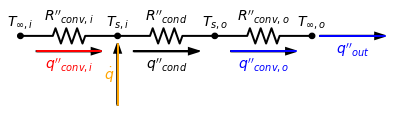

In [67]:
# Parameters
L_glass = 4e-3 #mm
k_glass = 0.4 #W/m.K
T_infty_i = 22 #K
h_i = 10 #W/m^2.K
T_infty_o = -10. #W/m^2.K
h_o = 65 #W/m^2.K
T_si = 12


Rpp = []
Rpp.append(res.Resistance("$R''_{conv,i}$","W/m^2"))
Rpp[0].convection(h_i)
Rpp.append(res.Resistance("$R''_{cond}$","W/m^2"))
Rpp[1].cond_plane(k_glass,L_glass)
Rpp.append(res.Resistance("$R''_{conv,o}$","W/m^2"))
Rpp[2].convection(h_o)

d = schem.Drawing()
d.add(e.DOT, label = r"$T_{\infty,i}$")
d.add(e.RES, d = 'right', label = Rpp[0].name)
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = Rpp[1].name)
d.add(e.DOT, label = r"$T_{s,o}$")
d.add(e.RES, d='right', label = Rpp[2].name)
d.add(e.DOT, label="$T_{\infty,o}$")
L1 = d.add(e.LINE, toplabel = "$\dot{q}$", endpts = [[3, -2.25], [3, -.25]], color = 'orange')
a1 = d.labelI(L1, arrowofst = 0)
a1.color = 'orange'
L2 = d.add(e.LINE, botlabel = "$q''_{conv,i}$", endpts = [[0.5, -0.5], [2.5, -0.5]], color = 'red')
d.labelI(L2, arrowofst = 0)
L3 = d.add(e.LINE, botlabel = "$q''_{cond}$", endpts = [[3.5, -0.5], [5.5, -0.5]], color = 'black')
d.labelI(L3, arrowofst = 0)
L4 = d.add(e.LINE, botlabel = "$q''_{conv,o}$", endpts = [[6.5, -0.5], [8.5, -0.5]], color = 'blue')
d.labelI(L4, arrowofst = 0)
L5 = d.add(e.LINE, botlabel = "$q''_{out}$", endpts = [[9.25, 0], [11.25, 0]], color = 'blue')
d.labelI(L5, arrowofst = 0)
d.draw()

In [68]:
Rpp_out = Rpp[1].R +Rpp[2].R
qpp_out = (1./Rpp_out)*(T_si - T_infty_o)
qpp_conv_i = (1./Rpp[0].R)*(T_infty_i - T_si)
qdot = qpp_out - qpp_conv_i

print("The energy needed for the heating element is %.0f W/m^2 to maintain a temperature of %.0f C on the interior surface" %(qdot,T_si))

The energy needed for the heating element is 767 W/m^2 to maintain a temperature of 12 C on the interior surface


# With radiation
Now solve the same problem but with radiation using  $\varepsilon=0.95$ and $T_{sur}=T_{\infty,o}$

## Assumptions
1D, steady state, constant thermodynamic properties and for radiation $T_{sur}=T_{\infty,o}$.

## Sketch of the problem

<img src="carwindowheatradiation.png" alt="my awesome sketch" width=50% >

## Equations

Conservation of energy on the interior surface of the windows dictates that

$$
q''_{conv,i} +\dot{q}=q''_{cond}
$$

with

$$
q''_{conv,i} = \frac{1}{R''_{conv,i}}(T_{\infty,i}-T_{s,i})=\frac{1}{1/10}(22-12)=100\mathrm{W}/\mathrm{m}^2
$$

and

$$
q''_{cond}=\frac{1}{R''_{cond}}(T_{s,i}-T_{s,o})
$$

Conservation of energy on the exterior surface is

$$
q''_{cond}=q''_{conv,o}+q''_{rad,o} = q''_{out}
$$

where 
$$
q''_{conv,o} = \frac{1}{R''_{conv,o}}(T_{s,o}-T_{\infty,o})
$$

and 

$$
q''_{rad,o}=\frac{1}{R''_{rad,o}}(T_{s,o}-T_{sur}),\; R''_{rad,o}=\left(\varepsilon\sigma(T_{s,o}+T_{sur})(T_{s,o}^2+T_{sur}^2)\right)^{-1}
$$

Since $R''_{rad,o}$ is a function of $T_{s,o}$, the problem is solved iteratively. First, the thermal circuit on the right hand side of the interior surface must be reduced to an equivalent resistance, which is a function of $T_{s,o}$

The total equivalent resistance on the RHS of $T_{s,i}$ is
$$
R''_{out} = R''_{cond}+R''_{conv+rad,o}
$$
with
$$
R''_{conv+rad,o}=\left(\frac{1}{R''_{conv,o}}+\frac{1}{R''_{rad,o}}\right)^{-1}
$$
yielding

$$
q''_{out}=\frac{1}{R''_{out}}(T_{s,i}-T_{\infty,i})
$$

The temperature on the outer surface of the glass can be then computed:

$$
T_{s,o}=T_{s,i}-R''_{cond}q''_{cond}
$$

The iterative method consists of:
* Step 0: choose an initial guess $T_{s,o}^{(n)}$
* Step 1: Calculate $h_r(T_{s,o}^{(n)})$, then $R''^{(n)}_{out}$ and finally $q''^{(n)}_{out}$
* Step 2: Calculate $T_{s,o}^{(n+1)}$ from $q''^{(n)}_{out}$ from the equation above.
* Step 3: Compute the error $e_n=\vert T_{s,o}^{(n)}- T_{s,o}^{(n+1)}\vert$. If $e_n>\epsilon$, $\epsilon$ being the accuracy desired on the temperature, repeat steps 0 to 3, replacing with $T_{s,o}^{(n+1)}$ as initial guess.

Once $T_{s,o}$ is converged, $q''_{out}$ is converged and 

$$
\dot{q}=q''_{cond}-q''_{conv,i}=q''_{out}-q''_{conv,i}
$$



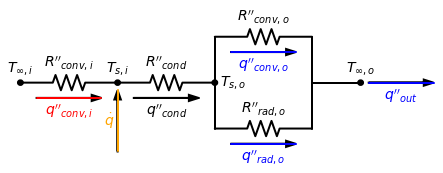

In [76]:
# Parameters
L_glass = 4e-3 #mm
k_glass = 0.4 #W/m.K
T_infty_i = 22 #C
h_i = 10 #W/m^2.K
T_infty_o = T_sur= -10. #C
h_o = 65 #W/m^2.K
T_si = 12 #C
eps = 0.95

Rpp = []
Rpp.append(res.Resistance("$R''_{conv,i}$","W/m^2"))
Rpp[0].convection(h_i)
Rpp.append(res.Resistance("$R''_{cond}$","W/m^2"))
Rpp[1].cond_plane(k_glass,L_glass)
Rpp.append(res.Resistance("$R''_{conv,o}$","W/m^2"))
Rpp[2].convection(h_o)
Rpp.append(res.Resistance("$R''_{rad,o}$","W/m^2"))

d = schem.Drawing()
d.add(e.DOT, label = r"$T_{\infty,i}$")
d.add(e.RES, d = 'right', label = Rpp[0].name)
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = Rpp[1].name)
d.add(e.DOT, rgtlabel = r"$T_{s,o}$")
d.add(e.LINE, d = 'up', l = 1.5)
d.add(e.RES, d='right', label = Rpp[2].name)
d.add(e.LINE, d = 'down', l = 1.5)
d.add(e.LINE, d = 'right', l = 1.5)
d.add(e.DOT, label="$T_{\infty,o}$")
d.add(e.LINE, d = 'down', l =1.5, xy = R1.end)
d.add(e.RES, d='right', label = Rpp[3].name)
d.add(e.LINE, d = 'up', l = 1.5)
L1 = d.add(e.LINE, toplabel = "$\dot{q}$", endpts = [[3, -2.25], [3, -.25]], color = 'orange')
a1 = d.labelI(L1, arrowofst = 0)
a1.color = 'orange'
L2 = d.add(e.LINE, botlabel = "$q''_{conv,i}$", endpts = [[0.5, -0.5], [2.5, -0.5]], color = 'red')
d.labelI(L2, arrowofst = 0)
L3 = d.add(e.LINE, botlabel = "$q''_{cond}$", endpts = [[3.5, -0.5], [5.5, -0.5]], color = 'black')
d.labelI(L3, arrowofst = 0)
L4 = d.add(e.LINE, botlabel = "$q''_{conv,o}$", endpts = [[6.5, 1.0], [8.5, 1.0]], color = 'blue')
d.labelI(L4, arrowofst = 0)
L41 = d.add(e.LINE, botlabel = "$q''_{rad,o}$", endpts = [[6.5, -2.0], [8.5, -2.0]], color = 'blue')
d.labelI(L41, arrowofst = 0)
L5 = d.add(e.LINE, botlabel = "$q''_{out}$", endpts = [[10.75, 0], [12.75, 0]], color = 'blue')
d.labelI(L5, arrowofst = 0)
d.draw()

In [91]:
from Libraries import thermodynamics as thermo
e_threshold = 0.1
e = np.inf
T_so = 50. #C
iteration = 0
while (e > e_threshold) and (iteration < 10):
    T_so_ini = T_so
    Rpp[3].radiation(eps,thermo.C2K(T_so),thermo.C2K(T_sur))
    Rpp_convrad_o = 1./(1/Rpp[2].R + 1/Rpp[3].R)
    Rpp_out = Rpp[1].R + Rpp_convrad_o
    qpp_out = 1/Rpp_out*(T_si - T_infty_o)
    T_so = T_si - Rpp[1].R*qpp_out
    e = abs(T_so - T_so_ini)
    iteration += 1
    print("iteration: %i, T_so = %.10f C, error = %.4e" %(iteration, T_so, e))

qpp_conv_i = (1./Rpp[0].R)*(T_infty_i - T_si)
qdot = qpp_out - qpp_conv_i

print("The energy needed for the heating element is %.0f W/m^2 to maintain a temperature of %.0f C on the interior surface" %(qdot,T_si))

iteration: 1, T_so = 2.9043486373 C, error = 4.7096e+01
iteration: 2, T_so = 3.0004525671 C, error = 9.6104e-02
The energy needed for the heating element is 800 W/m^2 to maintain a temperature of 12 C on the interior surface


In [90]:
800/767

1.0430247718383312

## Conclusion

Note that the radiation causes a 4.3% increase in electrical energy. As a first approximation, radiation is often neglected unless the heat transfer mechanism is governed by radiation. This assumption allows for the linearization of the thermal circuit and a straighfoward, direct solution. However always solve the problem with radiation if emissivity is provided or you are explicitly asked to include radiation.